#Tutorial on CNN
We try to build a DNN that recognize if an image contains a rectangle or a circle, count how many rectangle and circles are there or find where in the image the rectangle/circle is.

## Import useful stuff

In [94]:
from keras.layers import Dropout, Input, Conv2D, MaxPooling2D, Flatten, Dense #FILL ME# Which layers will be needed in a CNN ? we need convolutional layers, pooling layers, dense layers
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt

## Lets generate some data

We now generate ourself some images with a circle or a rectangle, of random color, in a random position.

Three different modes of generating the images are implemented:

*   A single shape per figure
*   Multiple shapes mixed in each figure
*   A single figure keeping track of the "bounding box"



### Additional Exercise
1. Try adding some random noise in the image background
2. Try adding more classes such e.g. Lines or Ellipses


In [95]:
import cv2

simple =False #single shape per figure
mixed  =False #multi shapes per figure
withBB =True  #one shape with bounding boxes

def background():
  return np.zeros((64,64,3), np.uint8) #EX# How would you change this to add some background noise?

def randomColor():
  return (int(np.random.rand()*128+128),int(np.random.rand()*128+128),int(np.random.rand()*128+128))

def drawCircle(c,x,y,r):
  img = background()
  cv2.circle(img,(x,y),r,c, -1)
  return img,x-r,y-r,x+r,y+r   #return image and bounding box

def genCircle():
  return drawCircle(randomColor(),int(np.random.rand()*50)+10,int(np.random.rand()*50)+10,
                    int(np.random.rand()*6)+3)

def drawRectangle(c,x,y,w,h):
  img = background()
  cv2.rectangle(img,(x,y),((x+w),(y+h)), c, -1)
  return img,x,y,x+w,y+h #return image and bounding box

def genRectangle():
  return drawRectangle(randomColor(),int(np.random.rand()*40)+10,int(np.random.rand()*40)+10,
                       int(np.random.rand()*12)+5,int(np.random.rand()*12)+5)

def genN(f,i): # generate multiple shapes
  img = np.zeros((64,64,3), np.uint8)
  for x in range(i):
    img+=f()[0] #discard bb info, take only image
  return img

nsamples=5000

#produce figures with either a rectangle or a circle
if simple :
  targets=np.random.rand(nsamples)>0.5
  images=np.array([genCircle()[0] if targets[x] else genRectangle()[0] for x in range(nsamples)])

#produce figure with n rectangles and m circles
if mixed:
#  targets=np.array([(int(np.random.rand()*4),int(np.random.rand()*4)) for x in range(nsamples) ])
  targets=np.stack( (np.random.rand(nsamples)*4,np.random.rand(nsamples)*4) ,axis=1)
  targets=np.array(targets,dtype=int)
  images=np.array([genN(genRectangle,targets[x,0])+genN(genCircle,targets[x,1]) for x in range(nsamples)])

if withBB :
#produce figures with either a rectangle or a circle
  targets=np.random.rand(nsamples)>0.5
  imagesWithBB=[genCircle() if targets[x] else genRectangle() for x in range(nsamples)]
  images=np.array([imagesWithBB[x][0] for x in range(nsamples)])
  boundingBoxes=np.array([imagesWithBB[x][1:] for x in range(nsamples)])


Let's show a few of the generated images

(5000, 64, 64, 3)
(5000,)
[ True False False  True]


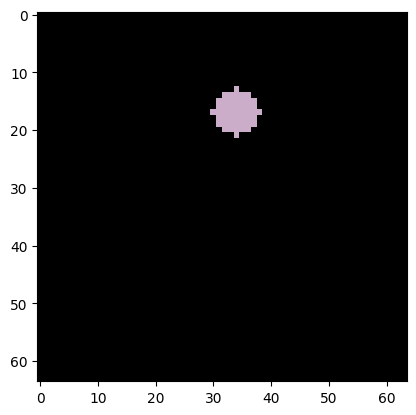

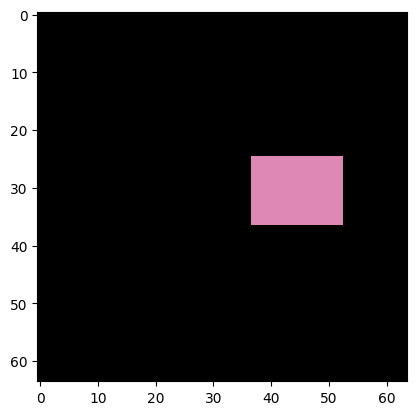

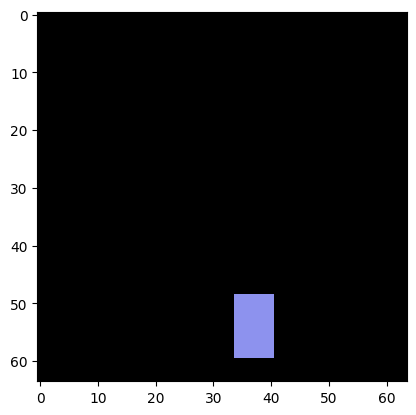

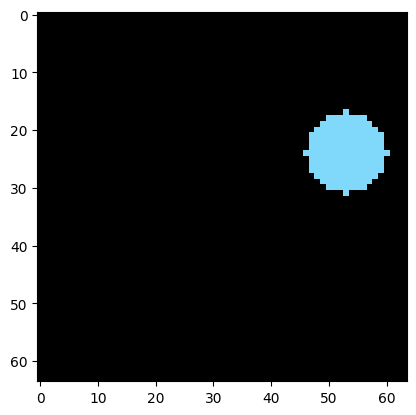

In [96]:
print(images.shape)
print(targets.shape)
print(targets[:4])
#FILL ME# print the shape of the images and target data
#FILL ME# print the the first N entries of the target data
#show the first 4 images#
for i in range(4):
  plt.imshow(images[i])
  plt.show()

# when doing the BB exercise
#  FILL ME#  print bounding box shapes and first N entries



## Additional Exercise
3. If we have more categories (let say N) we should use a categorical label that is a vector of length N with 1 on the category(/ies) the image belong to and 0 in the others. Try to build a categorical label for two categories

4. Expand the categorical label to  Ellispes or  Lines  and possibly also non exclusive categories such has 2D vs 1D objects

In [97]:
#QUESTION# What are the tensors now corresponding to "X" and "y"  ?
X=images#FILL ME#

if withBB :
    y=[targets,boundingBoxes] #FILL ME# multiple targets
else:
    y=targets#FILL ME#



# Let's build a CNN

Now we build our first CNN. We have some Conv layers interleaved with MaxPooling, and finally we flatten the output of the convolutional stack and appply a Dense FF:

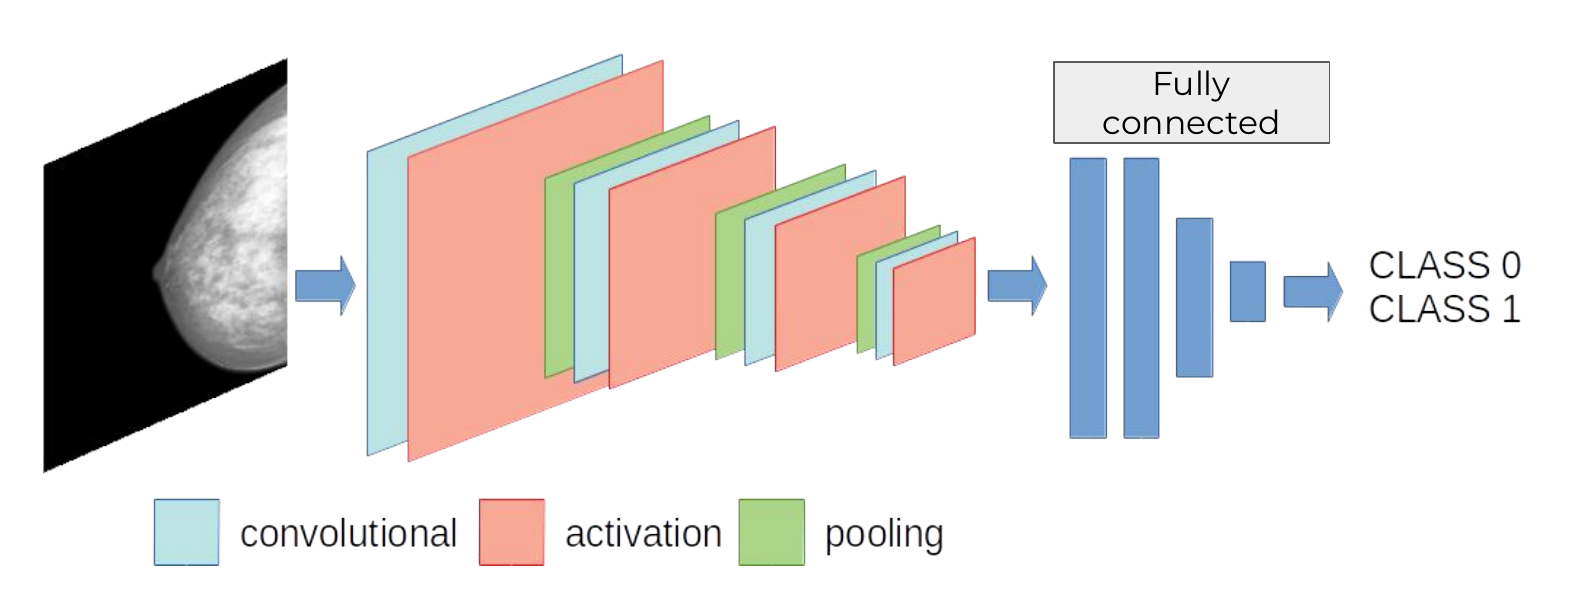
### MaxPooling
![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

### Additional Exercise
5. Try adding/removing convolutional layers, change the kernel size, try to add dropout
6. Try changing the model to categorical labels, change loss function from binary_crossentropy to categorical_crossentropy, and use softmax activation instead of sigmoid


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 62, 62, 5) │        140 │ input_layer_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_43    │ (None, 31, 31, 5) │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 29, 29, 5) │        230 │ max_pooling2d_43… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_44    │ (None, 14, 14, 5) │          0 │ conv2d_44[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 14, 14, 5) │          0 │ max_pooling2d_44… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 12, 12, 5) │        230 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_45    │ (None, 6, 6, 5)   │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 4, 4, 5)   │        230 │ max_pooling2d_45… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_46    │ (None, 2, 2, 5)   │          0 │ conv2d_46[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 20)        │          0 │ max_pooling2d_46… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 50)        │      1,050 │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 10)        │        510 │ dense_72[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 10)        │        110 │ dense_73[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 10)        │        110 │ dense_74[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_77 (Dense)    │ (None, 20)        │        220 │ dense_74[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_76 (Dense)    │ (None, 1)         │         11 │ dense_75[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_78 (Dense)    │ (None, 4)         │         84 │ dense_77[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,925 (11.43 KB)

 Trainable params: 2,925 (11.43 KB)

 Non-trainable params: 0 (0.00 B)

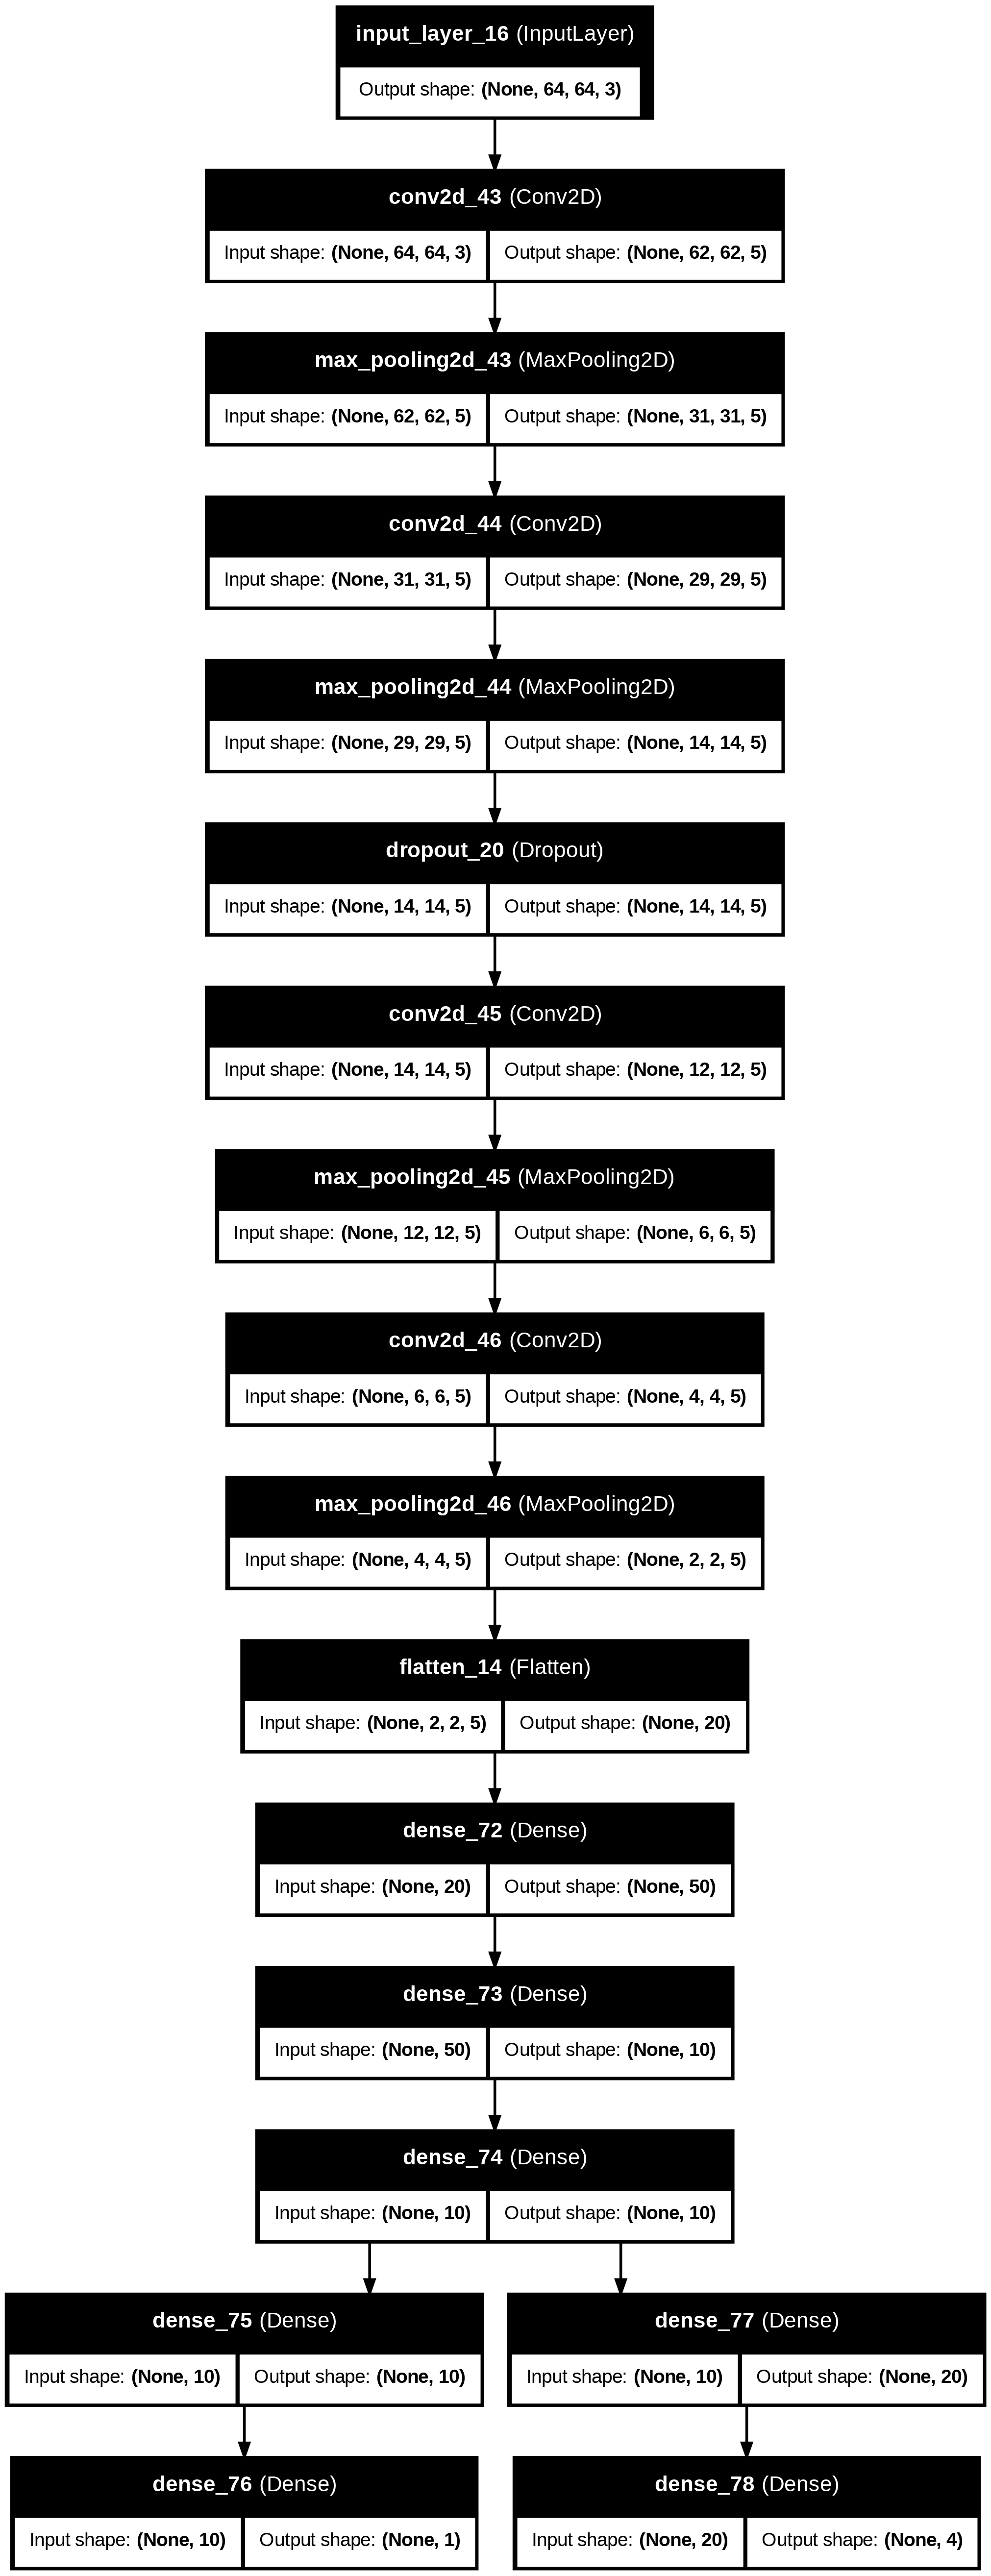

In [105]:
conv = True


inputs=Input(shape=(64,64,3)) #FILL ME# What is the input shape?
if  conv :
  #create a network with 3-4 convolutional layers
  x = Conv2D(5,(3,3),activation="relu")(inputs)
  x = MaxPooling2D((2,2))(x)
  x = Conv2D(5,(3,3),activation = "relu")(x)
  x = MaxPooling2D((2,2))(x)
  x = Dropout(0.25)(x)
  x = Conv2D(5,(3,3),activation = "relu")(x)
  x = MaxPooling2D((2,2))(x)
  x = Conv2D(5,(3,3),activation = "relu")(x)
  x = MaxPooling2D((2,2))(x)
  hidden=Flatten()(x)
else :
  #if we do not use convolution, we can just flatten the input tensor as first layer
  hidden= Flatten()(inputs)
# after the convolutional part we use standard FeedForward dense layers to further process
hidden=  Dense(50, activation='relu')(hidden)
hidden=  Dense(10, activation='relu')(hidden)
hidden=  Dense(10, activation='relu')(hidden)

#FILL ME# now let's try to decide the output layer, the activation and the loss based on the problem we have
if simple :
  outputs =  Dense(1 ,activation="sigmoid") (hidden)#FILLME# what is the output shape in this case? which activation?
  loss="binary_crossentropy"  # [0,1] classification hence loss should be => .... ?
if mixed :
  outputs = Dense(2, activation="linear")(hidden) #FILL ME#  Here we want to predict how many rect? and how many Circ?
  loss='MSE' #FILLME#
if withBB : #In this case we have two separate output layers, two target tensors, two losses
  h1=Dense(10, activation="relu")(hidden)
  output1 = Dense(1, activation='sigmoid')(h1) #FILLME# which activation for the circle vs rectangle classification?
  h2=Dense(20, activation="relu")(hidden)
  output2 = Dense(4, activation='linear')(h2) #FILLME# which activation to predict the 4 numbers of the bounding box ?
  outputs=[output1,output2]
  loss=["binary_crossentropy","MSE"] #FILL ME # And which loss for each of the two outputs? (the final loss will be the sum unless we give them some additional weights)


model = Model(inputs=inputs, outputs=outputs )
model.compile(loss=loss, optimizer='adam')

model.summary()
from tensorflow.keras.utils import plot_model
#Uncomment ME#  try to print the graph of the network in this case
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [106]:
history=model.fit( X , y ,validation_split=0.5,epochs=50) #FILL ME#

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - dense_76_loss: 5.1573 - dense_78_loss: 666.2715 - loss: 671.5190 - val_dense_76_loss: 2.2481 - val_dense_78_loss: 187.3793 - val_loss: 189.6994
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - dense_76_loss: 2.4784 - dense_78_loss: 142.6338 - loss: 145.1305 - val_dense_76_loss: 1.6031 - val_dense_78_loss: 109.8121 - val_loss: 111.7183
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - dense_76_loss: 1.7033 - dense_78_loss: 89.4934 - loss: 91.1911 - val_dense_76_loss: 1.2750 - val_dense_78_loss: 77.8571 - val_loss: 79.2030
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - dense_76_loss: 1.2461 - dense_78_loss: 70.4584 - loss: 71.7121 - val_dense_76_loss: 1.0353 - val_dense_78_loss: 85.8596 - val_loss: 87.1720
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - dense_76_loss: 1.1074 - dense_78_loss: 56.6399 - loss: 57.7579 - val_dense_76_loss: 0.9424 - val_dense_78_loss: 89.1973 - val_loss: 90.5516
Epoch 6/50
79/79 ━━━━━━━━━━━━━

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.




dict_keys(['dense_69_loss', 'dense_71_loss', 'loss', 'val_dense_69_loss', 'val_dense_71_loss', 'val_loss'])


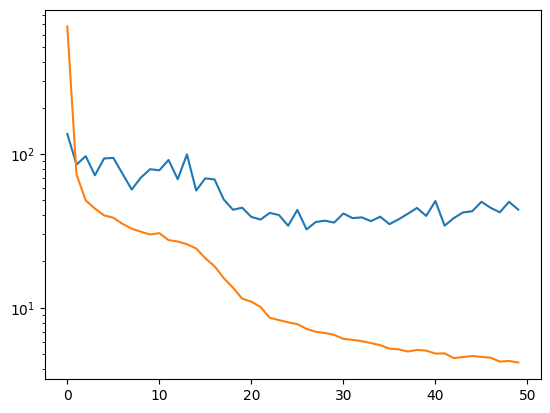

In [104]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.yscale("log")
plt.show()
#try plotting the separate loss components in the case of the bounding box problem
#plt.yscale('log')

#for classification problem you can plot also the accuracy metric
#plt.plot(history.history["val_accuracy"])
#plt.plot(history.history["accuracy"])
#plt.show()


Let's try to create a new image and evaluate it

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
14.635595 5.3181367 26.189943 16.435623
It is a circle


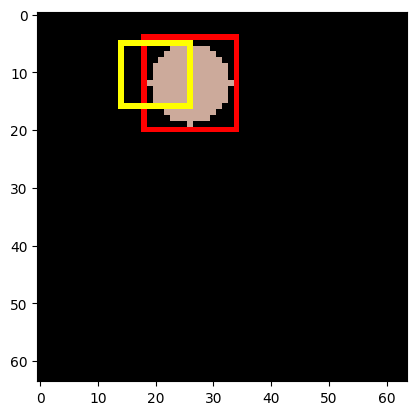

In [102]:
#FILL ME# try to generate a new circle and check if the network recognizes it
if simple:
  testimg= genCircle()[0]
  print(testimg.shape)
  plt.imshow(testimg)
  prediction=model.predict(testimg.reshape(1,64,64,3))
  print(prediction.shape)
  print(prediction[0])
  print("It is a" ,  "circle" if  prediction[0] > 0.5 else "rectangle" )


if mixed :
  im= genCircle()[0]+genRectangle()[0]+genRectangle()[0]
  prediction=model.predict(im.reshape(1,64,64,3))
  #FILL ME#try predicting on the "im" generated above... how do we access the number of predicted objects?
  print("In this image there are %s rectangle and %s circles"%( prediction[0][0] , prediction[0][1] ))
  plt.imshow(im)
  plt.show()

if withBB:
  im,x1,y1,x2,y2= genCircle()
  pre=model.predict(np.expand_dims(im,axis=0) )
  isCircle=pre[0][0]
  x1p=pre[1][0][0]-1.
  y1p=pre[1][0][1]-1.
  x2p=pre[1][0][2]+1.
  y2p=pre[1][0][3]+1.
  print(x1p,y1p,x2p,y2p)
  print("It is a","circle" if isCircle > 0.5 else "rectangle" )
  cv2.rectangle(im,(x1-1,y1-1),(x2+1,y2+1), (255,0,0), 1)
  cv2.rectangle(im,(int(x1p),int(y1p)),(int(x2p),int(y2p)), (255,255,0), 1)
  plt.imshow(im)
  plt.show()
